## ECE 4200 Assignment 4

## Problem 4 (Linear Regression and Regularization)

### <font color='red'> You can either write your own code or use python package SKLearn in this assignment, other packages for linear regression are not allowed </font>

In this assignment, we use the Concrete Compressive Strength Dataset (https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength) from UCI machine learning repository. We will explore how to use linear regression to predict the concrete compressive strength given the proportion of different materials you use to make high-performance concrete.
Typical instances of this dataset looks like the following:

|Cement kg/m^3| Blast Furnace Slag kg/m^3 |Fly Ash kg/m^3| Water kg/m^3|Superplasticizer kg/m^3|Coarse Aggregate  kg/m^3| Fine Aggregate kg/m^3|Age day|  Concrete compressive strength MPa|
|:------ :|:------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
| 540.0 | 0.0  |0.0    |162.0 |2.5 	 |1040.0| 676.0|28 	  |79.99 |
|540.0 	|0.0 |	0.0 |	162.0 |	2.5 	|1055.0 |	676.0 |	28 |61.89| 
|266.0 	|114.0 |	0.0 |	228.0 |	0.0 |	932.0 |	670.0 	|28 |	45.85| 

### Data Splitting
We randomly split the dataset into two parts, the training set and the test set. The training set consists of 430 data points and the test set consists of 600 data points. Generally, the training dataset is larger than the test dataset. However, in this assignment, we make the training set to be smaller in order to highlight the influence of regularization. (Think about why regularization is more important when you have a smaller training set.) 
Using the following lines, we load all the training data into a numpy array $train$ and all the testing data into a numpy array $test$.

In [1]:
import numpy as np
import pandas
Trainfile = pandas.read_excel('Train.xlsx')
Testfile = pandas.read_excel('Test.xlsx')
train = Trainfile.values
test = Testfile.values
#Trainfile #output all the training samples in a table


The training inputs are stored in array $X_{trn}$, where $X_{trn}[i][j]$ represents the $j$th attribute of the $i$th instance in the training set. The training outputs are stored in array $y_{trn}$, where $y_{trn}[i]$ is the output of the $i$th instance in the training test.
Similarly we store the inputs and outputs of the test set in $X_{tst}$ and $y_{tst}$

In [2]:
X_trn_raw, y_trn = train[:,:-1], train[:,-1:]
X_tst_raw, y_tst = test[:,:-1], test[:,-1:]

### Data Preprocessing
In order to better use linear regression, we shift normalize all the attributes of training input and testing input to make each attribute zero mean and norm no larger than 1. We are not normailizing the output. (Think about why.)
After that, we append a bias attribute 1 to each of the input feartures.

In [3]:
inputs = np.concatenate((X_trn_raw, X_tst_raw),axis = 0)
inputs = inputs - np.mean(inputs,axis=0) #shift
inputs = inputs/(np.max(inputs,axis=0)) #normalize
inputs = np.concatenate((inputs, np.ones((X_trn_raw.shape[0]+X_tst_raw.shape[0],1))), axis = 1) #add bias
X_trn = inputs[:X_trn_raw.shape[0],:]
X_tst = inputs[X_trn_raw.shape[0]:,:]

### Let's get started
We do recommend you to understand the aforementioned steps since data preprocessing is a very important skill for a machine learning engineer. However, if you don't understand the previous pre-processing steps, it's totally fine. Now let's see what we get:
1. Training set $[X_{trn}, Y_{trn}]$, where all the input attributes are zero-mean and normalized. At the end of all the training inputs, there is a bias term $1$ at the end.
2. Testing set $[X_{tst}, Y_{tst}]$ which has the same property as the training set.

### (1) Linear regression (without regularization)
Let's look at the first task. You can either use functions in Sklearn or write your own code to train a linear regressor on the training set.
The goal here is to find the $w$ which minimizes the training loss
\begin{equation}
    w^* = \arg \min_w \frac1{|S_{trn}|}\sum_{i \in S_{trn}}(w\cdot x_i - y_i)^2
\end{equation}
Output the squre root of your average training loss and average test loss
\begin{equation}
    l_{trn} = \sqrt{\frac1{|S_{trn}|}\sum_{i \in S_{trn}} ( w^*\cdot x_i - y_i)^2} \text{, }l_{tst} = \sqrt{\frac1{|S_{tst}|}\sum_{i \in S_{tst}} (w^* \cdot x_i - y_i)^2}
\end{equation}

In [4]:
# PART 1: Simple Linear Regression
# store your training loss in l_trn and testing loss in l_tst
#edit within this range

#=======FILL IN YOUR CODE HERE===========
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
l_trn = 0
l_tst = 0
# fit the model to X_trn and y_trn
reg = LinearRegression().fit(X_trn, y_trn)
sizetrn = len(X_trn)
sizetst = len(X_tst)
accum_trn = 0
accum_tst = 0
pred_trn = reg.predict(X_trn)
pred_tst = reg.predict(X_tst)

l_trn = mean_squared_error(y_trn, pred_trn, squared=False)
l_tst = mean_squared_error(y_tst, pred_tst, squared=False)
#===========END EDIT=====================
print('The average training loss is: ', l_trn)
print('The average test loss is: ', l_tst)

The average training loss is:  9.727779122009025
The average test loss is:  10.904551016681253


### (2) Linear Ridge regression

You may observe that training error is smaller than the test error. This is because we are overfitting to the training data. Regularization is a good way to avoid overfitting. Recall that $\lambda$- Ridge regression is to add an additional $\ell_2$-norm of the weight vector to refine the obejective function:

\begin{equation}
    w^\lambda = \arg \min_w \frac1{|S_{trn}|}\sum_{i \in S_{trn}}(w \cdot x_i - y_i)^2 + \lambda|w|^2
\end{equation}

Try Ridge regression on the same dataset (the dataset with more attributes) under $\lambda = 0.001 \times (1.2)^i, i = 0,1,2,3,...,99$. Plot the training loss and test loss under different regression parameter and answer the flowing questions:
1. Describe the trend of training error? (Increase w.r.t $\lambda$, decrese w.r.t $\lambda$, remain constant, first increase then decrease or first decrease then increase). Try to explain.

2. Describe the trend of testing error? (Increase w.r.t $\lambda$, decrese w.r.t $\lambda$, remain constant, first increase then decrease or first decrease then increase). Try to explain

Training and testing error are defined without the regularization term:
\begin{equation}
    l_{trn}^\lambda = \sqrt{\frac1{|S_{trn}|}\sum_{i \in S_{trn}} (w^\lambda \cdot x_i - y_i)^2} \text{, }l_{tst}^\lambda = \sqrt{\frac1{|S_{tst}|}\sum_{i \in S_{tst}} (w^\lambda \cdot x_i - y_i)^2}
\end{equation}

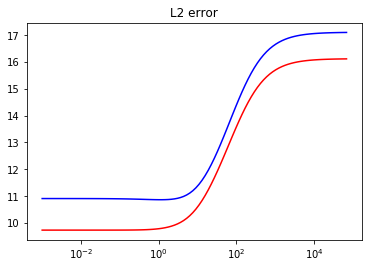

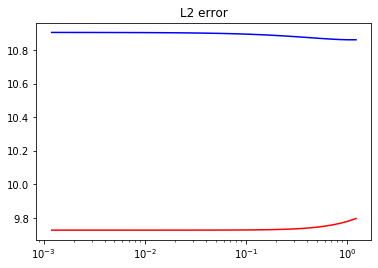

In [5]:
# PART 2: Linear Ridge Regression

# In this part, you will perform linear Ridge Regression. 
# You will plot the training and test error as a function of lambda

import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
%matplotlib inline
lamb = []
points = 100
for i in range(points):  
    lamb.append(0.001*(1.2**i))
    #= 0.001 * [1, 1.2, 1.44, ..., 1.2^99] #lambda values #lambda values
err_trn = [] # store your training error in this vector
err_tst = [] # store your testing error in this vector
#edit within this range

#========FILL IN CODE HERE==============
sizetrn = len(X_trn)
sizetst = len(X_tst)

for i in range(0,len(lamb)):
    accum_trn = 0
    accum_tst = 0
    clf = Ridge(alpha=lamb[i])
    clf.fit(X_trn,y_trn)
    pred_trn = clf.predict(X_trn)
    pred_tst = clf.predict(X_tst)
    l_trn = mean_squared_error(y_trn, pred_trn, squared=False)
    err_trn.append(l_trn)
    l_tst = mean_squared_error(y_tst, pred_tst, squared=False)
    err_tst.append(l_tst)
    
#===============END EDIT================
plt.semilogx(lamb,err_trn,color='red')
plt.semilogx(lamb,err_tst,color='blue')
plt.title("L2 error")
plt.show()
plt.semilogx(lamb[1:40],err_trn[1:40],color='red')
plt.semilogx(lamb[1:40],err_tst[1:40],color='blue')
plt.title("L2 error")
plt.show()

# <font color='blue'> Explanation for Problem 2 </font> #
## Training Error ##
<font color='blue'> For the training error, as we increase regularization to around an order of 10^0, the error is roughly constant with a loss below 10. As we go beyond 10^0, the loss increases rapidly to a loss of around 16 at a regularization value of 10^3. After 10^3, the loss flattens out to a loss of approximately 16. I think that the model is well-fitted for the dataset with a lambda under 10^0. Beyond this lambda, the error increases rapidly because the model is becoming more simple, which is subject to underfitting. At a lambda of 10^3, the loss has stabilized, as further regularization does not seem to affect the simplicity of the model significantly. </font> 
## Testing Error ##
<font color='blue'> For the testing error, as we increase regularization to around an order of 10^0, the error is decreasing slightly to a loss higher than 10.8. As we go beyond 10^0, the loss increases rapidly to a loss of around 17 at a regularization value of 10^3. After 10^3, the loss flattens out to a loss of approximately 17. I think that the model is initially adequate for the dataset with a lambda of 10^-3. As we increase lambda to 10^0, the model is performing slightly better, with less overfitting, as witnessed by the slight decline in the loss. Beyond a lambda of 10^0, the error increases rapidly because the model is becoming more simple, which is subject to underfitting. At a lambda of 10^3, the loss has stabilized, as further regularization does not seem to affect the simplicity of the model significantly. As expected, the testing error is higher than the training error, as the model is expected to perform better on the data it has seen before. </font> 

###  Add more attributes

Can we do more beyond simple linear regression? Since the relationship between each attribute and the final output may not necessarily be linear, we may do better if we add some non-linearity. We can add the square of each attribute to our training input and do linear regression on the new set of attributes.

Remark: This is called polynomial regression, please google it if you are interested.

In [6]:
inputs = np.concatenate((X_trn_raw, X_tst_raw),axis = 0)
inputs_new = np.concatenate((inputs,np.square(inputs)),axis=1) #add square term
inputs_new = inputs_new - np.mean(inputs_new,axis=0) #shift
inputs_new = inputs_new/(np.max(inputs_new,axis=0)) #normalize
inputs_new = np.concatenate((inputs_new, np.ones((X_trn_raw.shape[0]+X_tst_raw.shape[0],1))), axis = 1) # add bias
X_trn_new = inputs_new[:X_trn_raw.shape[0],:]
X_tst_new = inputs_new[X_trn_raw.shape[0]:,:]

### (3) Quadratic regression (without regularization)
Recall now we have $X^{new}_{trn}$ as our new training features and $X^{new}_{tst}$ as our new test features. 
\begin{equation}
    x^{new}_i = (x_i[1],x_i[2], ..., x_i[d], x_i[1]^2,x_i[2]^2, ..., x_i[d]^2 )
\end{equation}
Do the same thing as in Problem (1). Find the minimizer of the training error:
\begin{equation}
    w^* = \arg \min_w \frac1{|S_{trn}|}\sum_{i \in S_{trn}}(w \cdot x^{new}_i - y_i)^2
\end{equation}
Output the squre root of your average training loss and average test loss
\begin{equation}
    l_{trn} = \sqrt{\frac1{|S_{trn}|}\sum_{i \in S_{trn}} (w^* \cdot x^{new}_i - y_i)^2} \text{, }l_{tst} = \sqrt{\frac1{|S_{tst}|}\sum_{i \in S_{tst}} (w^*\cdot x^{new}_i - y_i)^2}
\end{equation}

In [7]:
#PART 3: Quatratic Regression

# store your training loss in l_trn and testing loss in l_tst
#edit within this range

#============FILL IN CODE HERE============
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
l_trn = 0
l_tst = 0
# fit the model to X_trn and y_trn
reg = LinearRegression().fit(X_trn_new, y_trn)
sizetrn = len(X_trn_new)
sizetst = len(X_tst_new)
accum_trn = 0
accum_tst = 0
pred_trn = reg.predict(X_trn_new)
pred_tst = reg.predict(X_tst_new)

l_trn = mean_squared_error(y_trn, pred_trn, squared=False)
l_tst = mean_squared_error(y_tst, pred_tst, squared=False)
#================end edit=================
print('The average training loss is: ', l_trn)
print('The average test loss is: ', l_tst)

The average training loss is:  7.481820649524703
The average test loss is:  8.871400924312628


### (4) Quadratic Ridge regression

In this problem, we do the same regularization as in Problem (2) to our new dataset:

Recall that $\lambda$- Ridge regression is to add an additional $\ell_2$-norm of the weight vector to refine the obejective function:

\begin{equation}
    w^\lambda = \arg \min_w \frac1{|S_{trn}|}\sum_{i \in S_{trn}}(w\cdot x^{new}_i - y_i)^2 + \lambda|w|^2
\end{equation}

Try Ridge regression on the new dataset (the dataset with more attributes) under $\lambda = 0.001 \times (1.2)^i, i = 0,1,2,3,...,99$. Plot the training loss and test loss under different regression parameter and answer the flowing questions:
1. Describe the trend of training error? (Increase w.r.t $\lambda$, decrese w.r.t $\lambda$, remain constant, first increase then decrease or first decrease then increase). Try to explain.

2. Describe the trend of testing error? (Increase w.r.t $\lambda$, decrese w.r.t $\lambda$, remain constant, first increase then decrease or first decrease then increase). Try to explain

Training and testing error are defined without the regularization term:
\begin{equation}
    l_{trn}^\lambda = \sqrt{\frac1{|S_{trn}|}\sum_{i \in S_{trn}} (w^\lambda\cdot x^{new}_i - y_i)^2} \text{, }l_{tst}^\lambda = \sqrt{\frac1{|S_{tst}|}\sum_{i \in S_{tst}} (w^\lambda\cdot x^{new}_i - y_i)^2}
\end{equation}

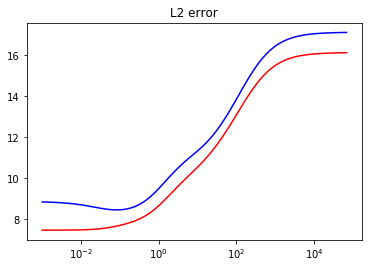

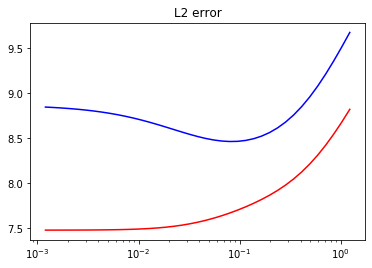

In [8]:
# PART 4: Quadratic Ridge Regression

# In this part, you will perform Ridge Regression. 
# You will plot the training and test error as a function of lambda

import matplotlib.pyplot as plt
%matplotlib inline
lamb = []
points = 100
for i in range(points):  
    lamb.append(0.001*(1.2**i))
    #= 0.001 * [1, 1.2, 1.44, ..., 1.2^99] #lambda values
err_trn = [] # store your training error in this vector
err_tst = [] # store your testing error in this vector

#=========PLEASE FILL IN THE CODE HERE=========
sizetrn = len(X_trn_new)
sizetst = len(X_tst_new)

for i in range(0,len(lamb)):
    accum_trn = 0
    accum_tst = 0
    clf = Ridge(alpha=lamb[i])
    clf.fit(X_trn_new,y_trn)
    pred_trn = clf.predict(X_trn_new)
    pred_tst = clf.predict(X_tst_new)
    l_trn = mean_squared_error(y_trn, pred_trn, squared=False)
    err_trn.append(l_trn)
    l_tst = mean_squared_error(y_tst, pred_tst, squared=False)
    err_tst.append(l_tst)

#==================end edit====================

plt.semilogx(lamb,err_trn,color='red')
plt.semilogx(lamb,err_tst,color='blue')
plt.title("L2 error")
plt.show()
plt.semilogx(lamb[1:40],err_trn[1:40],color='red')
plt.semilogx(lamb[1:40],err_tst[1:40],color='blue')
plt.title("L2 error")
plt.show()

# <font color='blue'> Explanation for Problem 4 </font> #
## Training Error ##
<font color='blue'> For the training error, as we increase regularization to around an order of 10^-2, the error is roughly constant, with a loss of 7.5. As we go beyond 10^-2, the loss increases rapidly to a loss of around 16 at a regularization value of 10^3. After 10^3, the loss flattens out to a loss of approximately 16. I think that the model is well-fitted for the dataset with a lambda under 10^-2. Beyond this lambda, the error increases rapidly because the model is becoming more simple, which is subject to underfitting. At a lambda of 10^3, the loss has stabilized, as further regularization does not seem to affect the simplicity of the model significantly. </font> 
## Testing Error ##
<font color='blue'> For the testing error, as we increase regularization to around an order of 10^-1, the error is decreasing to a loss of 8.5. As we go beyond 10^-1, the loss increases rapidly to a loss of around 17 at a regularization value of 10^3. After 10^3, the loss flattens out to a loss of approximately 17. I think that the model trained using the training set is initially slightly overfitted for the testing dataset with a lambda of 10^-3. As we increase lambda to 10^-1, the model is performing better, with less overfitting, as witnessed by the slight decline in the loss. Beyond a lambda of 10^-1, the error increases rapidly because the model is becoming too simple, which is subject to underfitting. At a lambda of 10^3, the loss has stabilized, as further regularization does not seem to affect the simplicity of the model significantly. As expected, the testing error is higher than the training error, as the model is expected to perform better on the data it has seen before. </font> 

### (5) Discussion
Compare the plots of Linear Ridge Regression and Quadratic Ridge Regression. When regularization parameter $\lambda=0$, which method suffers more from overfitting, linear regression or quadratic regression? Explain how you discover it from the plots, and why this method suffers more from overfitting.

### Your Answer Here:
<font color='blue'>
The training error plots are similar for linear ridge regression and quadratic ridge regression. Both plots take on the same shape. For the testing error for quadratic ridge regression, the loss seems to decrease more as we increase regularization to a value of 10^-1 compared to the initial decrease in the loss for linear ridge regression. Both the linear ridge regression and quadratic ridge regression yield a final training and testing loss of approximately 16 and 17, respectively. I think that the quadratic ridge regression method suffers more from overfitting at $\lambda=0$, as when we increase $\lambda$ to 10^-1, the testing error for the quadratic method decreased by 0.5. For the linear ridge regression method, as when we increase $\lambda$ to 10^0, the testing error decreased by a minimal amount. Thus, the improvements from increasing regularization are more significant for the quadratic method than the linear method, implying that the quadratic model is initially more overfitted. The quadratic model suffers more from overfitting as the model itself is more complicated (second-order instead of linear) and uses a larger feature space than the linear model. </font>